In [1]:
# import necessary libraries
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import math
import re
import time
import os
import sys
import csv
import string
import warnings
warnings.filterwarnings('ignore') 

import statsmodels.formula.api as sm

from sklearn import tree, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option("display.max_rows", 100, "display.max_columns", 100)

Here we will do actual analysis. Since we have already converted the dataframes to csv files, we won't have to run all the web-scraping algorithms.

In [2]:
all_nba_players = pd.read_csv('csv_files/all_nba_players.csv')

In [3]:
display(all_nba_players.head(500))
display(all_nba_players.dtypes)

Player  Debut  Last Active  YOE  Retired Position Team  \
0         Alaa Abdelnaby   1990         1995    5        1       PF  POR   
1        Zaid Abdul-Aziz   1968         1978   10        1        C  HOU   
2    Kareem Abdul-Jabbar   1969         1989   20        1        C  LAL   
3     Mahmoud Abdul-Rauf   1990         2001    9        1       PG  DEN   
4      Tariq Abdul-Wahad   1997         2003    6        1       SG  DEN   
..                   ...    ...          ...  ...      ...      ...  ...   
495         Ernest Brown   2001         2002    1        1        C  MIA   
496           Fred Brown   1971         1984   13        1       SG  OKC   
497         George Brown   1957         1958    1        1      NaN  LAL   
498         Gerald Brown   1998         1999    1        1       SG  PHO   
499       Greg Brown III   2021         2022    1        0       SF  POR   

     Total Games  Career PPG  Career RPG  Career APG  Career FG%  Career FG3%  \
0            256         5.7         3.3         0.3        50.2          0.0   
1            505         9.0         8.0         1.2        42.8          0.0   
2           1560        24.6        11.2         3.6        55.9          5.6   
3            586        14.6         1.9         3.5        44.2         35.4   
4            236         7.8         3.3         1.1        41.7         23.7   
..           ...         ...         ...         ...         ...          ...   
495            3         1.0         2.0         0.0        16.7          0.0   
496          963        14.6         2.7         3.3        47.8         37.3   
497            1         1.0         1.0         0.0         0.0          0.0   
498           33         2.4         0.7         0.9        37.1         30.0   
499           47         4.7         2.8         0.7        44.0         32.1   

     Career FT%  Career eFG%   PER  Total WS  Hall of Fame  Year Inducted  \
0          70.1         50.2  13.0       4.8             0              0   
1          72.8          0.0  15.1      17.5             0              0   
2          72.1         55.9  24.6     273.4             1           1995   
3          90.5         47.2  15.4      25.2             0              0   
4          70.3         42.2  11.4       3.5             0              0   
..          ...          ...   ...       ...           ...            ...   
495        25.0         16.7   0.0       0.0             0              0   
496        85.8         48.2  17.7      63.2             0              0   
497        50.0          0.0   0.0       0.0             0              0   
498        78.6         38.8   7.3       0.0             0              0   
499        67.7         48.9  11.8       0.6             0              0   

     All-Stars  Scoring Champs  Rebound Champs  Assist Champs  Steal Champs  \
0            0               0               0              0             0   
1            0               0               0              0             0   
2           19               2               1              0             0   
3            0               0               0              0             0   
4            0               0               0              0             0   
..         ...             ...             ...            ...           ...   
495          0               0               0              0             0   
496          1               0               0              0             0   
497          0               0               0              0             0   
498          0               0               0              0             0   
499          0               0               0              0             0   

     Block Champs  NBA Champs  All-NBA  All-Rookie  ROY  All-Defensive  \
0               0           0        0           0    0              0   
1               0           0        0           0    0              0   
2               4           6       

Player                   object
Debut                     int64
Last Active               int64
YOE                       int64
Retired                   int64
Position                 object
Team                     object
Total Games               int64
Career PPG              float64
Career RPG              float64
Career APG              float64
Career FG%              float64
Career FG3%             float64
Career FT%              float64
Career eFG%             float64
PER                     float64
Total WS                float64
Hall of Fame              int64
Year Inducted             int64
All-Stars                 int64
Scoring Champs            int64
Rebound Champs            int64
Assist Champs             int64
Steal Champs              int64
Block Champs              int64
NBA Champs                int64
All-NBA                   int64
All-Rookie                int64
ROY                       int64
All-Defensive             int64
Most Improved             int64
Sixth Ma

In [4]:
display(all_nba_players.describe())

Debut  Last Active          YOE      Retired  Total Games  \
count  4397.000000  4397.000000  4397.000000  4397.000000  4397.000000   
mean   1991.204003  1996.766432     5.268820     0.807824   290.551740   
std      20.994117    21.249146     4.500436     0.394056   320.393188   
min    1946.000000  1950.000000     1.000000     0.000000     1.000000   
25%    1976.000000  1982.000000     1.000000     1.000000    34.000000   
50%    1993.000000  2000.000000     3.000000     1.000000   143.000000   
75%    2010.000000  2016.000000     8.000000     1.000000   490.000000   
max    2021.000000  2022.000000    22.000000     1.000000  1611.000000   

        Career PPG   Career RPG   Career APG   Career FG%  Career FG3%  \
count  4397.000000  4397.000000  4397.000000  4397.000000  4397.000000   
mean      6.455788     2.942188     1.456902    41.443484    17.307619   
std       4.823565     2.276650     1.392988    10.820365    17.165869   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.900000     1.300000     0.500000    37.600000     0.000000   
50%       5.200000     2.400000     1.000000    42.700000    17.600000   
75%       8.700000     3.900000     2.000000    46.900000    32.700000   
max      30.100000    22.900000    11.200000   100.000000   100.000000   

        Career FT%  Career eFG%          PER     Total WS  Hall of Fame  \
count  4397.000000  4397.000000  4397.000000  4397.000000   4397.000000   
mean     67.131385    36.414373    11.315624    14.825904      0.035934   
std      20.159278    20.840834     5.753744    27.241631      0.186146   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      62.300000    30.000000     8.700000     0.100000      0.000000   
50%      71.800000    45.300000    11.600000     2.300000      0.000000   
75%      78.400000    49.800000    14.200000    17.800000      0.000000   
max     100.000000   150.000000    88.300000   273.400000      1.000000   

       Year Inducted    All-Stars  Scoring Champs  Rebound Champs  \
count    4397.000000  4397.000000     4397.000000     4397.000000   
mean       63.221060     0.411417        0.017057        0.016375   
std       349.962118     1.663636        0.254049        0.269305   
min         0.000000     0.000000        0.000000        0.000000   
25%         0.000000     0.000000        0.000000        0.000000   
50%         0.000000     0.000000        0.000000        0.000000   
75%         0.000000     0.000000        0.000000        0.000000   
max      2022.000000    19.000000       10.000000       11.000000   

       Assist Champs  Steal Champs  Block Champs   NBA Champs      All-NBA  \
count    4397.000000   4397.000000   4397.000000  4397.000000  4397.000000   
mean        0.016602      0.010917      0.010917     0.209234     0.203775   
std         0.270555      0.157809      0.168947     0.717566     1.171334   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.000000      0.000000      0.000000     0.000000     0.000000   
50%         0.000000      0.000000      0.000000     0.000000     0.000000   
75%         0.000000      0.000000      0.000000     0.000000     0.000000   
max         9.000000      6.000000      4.000000    11.000000    17.000000   

        All-Rookie          ROY  All-Defensive  Most Improved    Sixth Man  \
count  4397.000000  4397.000000    4397.000000    4397.000000  4397.000000   
mean      0.112349     0.019331       0.126450       0.008187     0.008870   
std       0.315832     0.137702       0.834822       0.090123     0.113524   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       0.000000     0.000000       0.000000       0.000000     0.000000   
50%       0.000000     0.000000       0.000000       0.000000     0.000000   
75%       0.000000     0.000000       0.000000       0.000000     0.000000   
max       1.000000     1.000000      15.000000       1

In [5]:
retired_csv = pd.read_csv('csv_files/retired_players.csv')

Debut  Last Active       YOE  Total Games  \
Debut                 1.000000     0.969948  0.020467    -0.047841   
Last Active           0.969948     1.000000  0.259240     0.184669   
YOE                   0.020467     0.259240  1.000000     0.974195   
Total Games          -0.047841     0.184669  0.974195     1.000000   
Career PPG           -0.181047    -0.003343  0.720611     0.767218   
Career RPG           -0.183020    -0.033851  0.600922     0.632591   
Career APG           -0.164011    -0.030403  0.534674     0.577784   
Career FG%            0.142219     0.225618  0.364504     0.352325   
Career FG3%           0.452069     0.511459  0.301923     0.266613   
Career FT%           -0.064751     0.019789  0.333980     0.334794   
Career eFG%           0.682726     0.736151  0.308379     0.252511   
PER                   0.059025     0.168671  0.467759     0.473214   
Total WS             -0.077776     0.112097  0.794811     0.844993   
Hall of Fame         -0.177165    -0.093321  0.327360     0.366168   
Year Inducted        -0.148261    -0.065119  0.328290     0.366811   
All-Stars            -0.134297    -0.024419  0.443845     0.490534   
Scoring Champs       -0.045533    -0.014241  0.117326     0.129074   
Rebound Champs       -0.041751    -0.012255  0.120952     0.132638   
Assist Champs        -0.040676    -0.008657  0.117926     0.134102   
Steal Champs         -0.001409     0.026819  0.110748     0.124677   
Block Champs          0.000707     0.030419  0.126359     0.126023   
NBA Champs           -0.106573    -0.017529  0.354457     0.370750   
All-NBA              -0.084213    -0.000394  0.338038     0.365881   
All-Rookie            0.043462     0.139174  0.413744     0.440002   
ROY                  -0.071161    -0.019284  0.206566     0.227184   
All-Defensive        -0.023231     0.046229  0.293072     0.324023   
Most Improved         0.040869     0.068533  0.120128     0.109578   
Sixth Man             0.026851     0.064241  0.162557     0.165357   
AS MVPs              -0.062821    -0.013125  0.193339     0.214157   
DPOYs                 0.012661     0.042268  0.125746     0.129666   
MVPs                 -0.044410    -0.001732  0.166519     0.188204   
Finals MVPs          -0.012603     0.028031  0.159932     0.174730   
NBA 75th Anniv. Team -0.078013    -0.008364  0.279354     0.312330   

                      Career PPG  Career RPG  Career APG  Career FG%  \
Debut                  -0.181047   -0.183020   -0.164011    0.142219   
Last Active            -0.003343   -0.033851   -0.030403    0.225618   
YOE                     0.720611    0.600922    0.534674    0.364504   
Total Games             0.767218    0.632591    0.577784    0.352325   
Career PPG              1.000000    0.674742    0.661922    0.346492   
Career RPG              0.674742    1.000000    0.262940    0.328530   
Career APG              0.661922    0.262940    1.000000    0.149137   
Career FG%              0.346492    0.328530    0.149137    1.000000   
Career FG3%             0.222327   -0.026847    0.248264    0.149264   
Career FT%              0.400027    0.176902    0.336493    0.187771   
Career eFG%             0.126804    0.052466    0.061332    0.561624   
PER                     0.543416    0.460899    0.332701    0.660034   
Total WS                0.792017    0.649218    0.561194    0.279609   
Hall of Fame            0.486797    0.408666    0.342986    0.095766   
Year Inducted           0.499286    0.410581    0.349968    0.102514   
All-Stars               0.624429    0.487713    0.423134    0.136295   
Scoring Champs          0.263541    0.182262    0.121900    0.042442   
Rebound Champs          0.151282    0.299003    0.062265    0.046361   
Assist Champs           0.121278    0.049042    0.306623    0.024059   
Steal Champs            0.149714    0.050723    0.232719    0.031383   
Block Champs            0.070192    0.150239    0.009764    0.047036   
NBA Champs              0.285560    0.274486    0.221899    

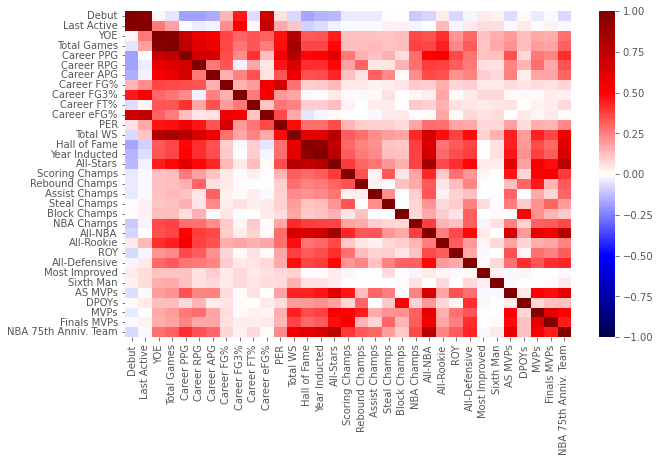

In [6]:
#correlation matrix #we'll also drop the retired column since it's not particularly useful
corr = retired_csv.drop(columns=['Retired']).corr()
display(corr)

# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='seismic');
plt.show()

In [7]:
# pd.plotting.scatter_matrix(corr, c='b', alpha=0.6, figsize=(15, 10), diagonal='hist');
# plt.show()

In [8]:
#correlation matrix
hof_corr = retired_csv.drop(columns=['Retired','Year Inducted']).corr()['Hall of Fame']
display(hof_corr)

Debut                  -0.177165
Last Active            -0.093321
YOE                     0.327360
Total Games             0.366168
Career PPG              0.486797
Career RPG              0.408666
Career APG              0.342986
Career FG%              0.095766
Career FG3%            -0.015188
Career FT%              0.099830
Career eFG%            -0.052968
PER                     0.273555
Total WS                0.588619
Hall of Fame            1.000000
All-Stars               0.740993
Scoring Champs          0.295284
Rebound Champs          0.244303
Assist Champs           0.217959
Steal Champs            0.115367
Block Champs            0.109246
NBA Champs              0.379369
All-NBA                 0.640748
All-Rookie              0.272506
ROY                     0.325828
All-Defensive           0.360417
Most Improved          -0.001830
Sixth Man               0.056337
AS MVPs                 0.430006
DPOYs                   0.196225
MVPs                    0.347557
Finals MVP

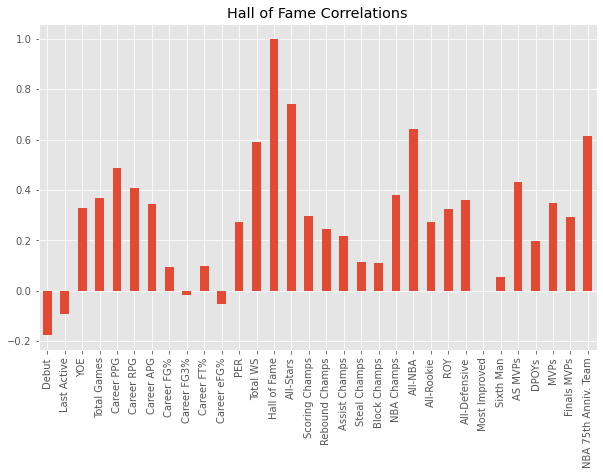

In [9]:
hof_corr.plot.bar()
plt.title('Hall of Fame Correlations')
plt.show()

In [10]:
# we'll also delete Hall of Fame since it directly correlates to itself
remove_key = ['Hall of Fame']

hof_corr_dict = hof_corr.to_dict()
[hof_corr_dict.pop(var) for var in remove_key]

print(hof_corr_dict)

{'Debut': -0.1771647804315838, 'Last Active': -0.09332134543654481, 'YOE': 0.3273602919073686, 'Total Games': 0.3661682798962694, 'Career PPG': 0.48679725814199776, 'Career RPG': 0.40866631854906466, 'Career APG': 0.3429858132549136, 'Career FG%': 0.09576648186087196, 'Career FG3%': -0.015188479039718917, 'Career FT%': 0.09983043846678175, 'Career eFG%': -0.05296847255477972, 'PER': 0.27355517852273525, 'Total WS': 0.5886191600509024, 'All-Stars': 0.7409930663828911, 'Scoring Champs': 0.2952838762601664, 'Rebound Champs': 0.24430260705877385, 'Assist Champs': 0.21795901401442042, 'Steal Champs': 0.11536743754484192, 'Block Champs': 0.10924630522910003, 'NBA Champs': 0.37936923252371896, 'All-NBA': 0.6407479856837613, 'All-Rookie': 0.27250630891721167, 'ROY': 0.3258282567407332, 'All-Defensive': 0.36041660972900913, 'Most Improved': -0.0018303151539585426, 'Sixth Man': 0.056337016372873396, 'AS MVPs': 0.4300057753701477, 'DPOYs': 0.19622456051219372, 'MVPs': 0.34755713571677177, 'Finals

Lets choose all variables that have a moderate positive correlation; which is anything above 0.30 (nearest 2 decimal points):

In [11]:
predictive_variables = [key for key, value in hof_corr_dict.items() if round(value, 2) >= 0.3]

In [12]:
print(predictive_variables, len(predictive_variables))

['YOE', 'Total Games', 'Career PPG', 'Career RPG', 'Career APG', 'Total WS', 'All-Stars', 'Scoring Champs', 'NBA Champs', 'All-NBA', 'ROY', 'All-Defensive', 'AS MVPs', 'MVPs', 'NBA 75th Anniv. Team'] 15


In [13]:
hof_csv = pd.read_csv('csv_files/hall_of_famers.csv')

In [14]:
hof_csv.describe()

Debut  Last Active         YOE  Retired  Total Games  Career PPG  \
count   129.000000   129.000000  129.000000    129.0   129.000000  129.000000   
mean   1970.984496  1984.689922   13.372093      1.0   934.643411   18.292248   
std      15.374484    17.513744    3.288402      0.0   262.456181    4.571731   
min    1946.000000  1954.000000    3.000000      1.0   202.000000    5.700000   
25%    1958.000000  1972.000000   11.000000      1.0   767.000000   15.600000   
50%    1970.000000  1983.000000   13.000000      1.0   914.000000   18.500000   
75%    1984.000000  1999.000000   15.000000      1.0  1074.000000   20.800000   
max    2003.000000  2018.000000   21.000000      1.0  1611.000000   30.100000   

       Career RPG  Career APG  Career FG%  Career FG3%  Career FT%  \
count  129.000000  129.000000  129.000000   129.000000  129.000000   
mean     7.743411    3.867442   46.586822    14.835659   76.672868   
std      4.009712    2.002895    4.983071    15.268563    7.702321   
min      1.900000    1.000000   30.200000     0.000000   41.400000   
25%      4.400000    2.500000   43.800000     0.000000   73.600000   
50%      6.700000    3.500000   46.600000    14.700000   78.000000   
75%     10.300000    4.700000   50.400000    27.500000   81.000000   
max     22.900000   11.200000   58.200000    66.700000   90.400000   

       Career eFG%         PER    Total WS  Hall of Fame  Year Inducted  \
count   129.000000  129.000000  129.000000         129.0     129.000000   
mean     31.463566   19.310078  105.236434           1.0    1984.031008   
std      24.455259    3.214781   48.341775           0.0     176.779212   
min       0.000000   10.900000   16.100000           1.0       0.000000   
25%       0.000000   17.300000   75.000000           1.0    1987.000000   
50%      46.900000   19.000000   93.500000           1.0    2000.000000   
75%      50.700000   21.400000  130.000000           1.0    2014.000000   
max      58.200000   27.900000  273.400000           1.0    2022.000000   

        All-Stars  Scoring Champs  Rebound Champs  Assist Champs  \
count  129.000000      129.000000      129.000000     129.000000   
mean     7.565891        0.465116        0.403101       0.372093   
std      3.663257        1.311288        1.383606       1.381065   
min      0.000000        0.000000        0.000000       0.000000   
25%      5.000000        0.000000        0.000000       0.000000   
50%      7.000000        0.000000        0.000000       0.000000   
75%     10.000000        0.000000        0.000000       0.000000   
max     19.000000       10.000000       11.000000       9.000000   

       Steal Champs  Block Champs  NBA Champs     All-NBA  All-Rookie  \
count    129.000000    129.000000  129.000000  129.000000  129.000000   
mean       0.100775      0.116279    1.651163    4.527132    0.542636   
std        0.465110      0.553792    2.152946    3.958925    0.500121   
min        0.000000      0.000000    0.000000    0.000000    0.000000   
25%        0.000000      0.000000    0.000000    1.000000    0.000000   
50%        0.000000      0.000000    1.000000    4.000000    1.000000   
75%        0.000000      0.000000    2.000000    7.000000    1.000000   
max        3.000000      4.000000   11.000000   15.000000    1.000000   

              ROY  All-Defensive  Most Improved   Sixth Man     AS MVPs  \
count  129.000000     129.000000     129.000000  129.000000  129.000000   
mean     0.279070       1.868217       0.007752    0.038760    0.472868   
std      0.450291       3.371248       0.088045    0.230594    0.829886   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%      0.000000       0.000000       0.000000    0.000000    0.000000   
50%      0.000000       0.000000       0.000000    0.000000    0.000000   
75%      1.000000       2.000000       0.000000    0.000000    1.000000   
max      1.000000      15.000000       1.000000    2.000000    4.000000   

            DPOYs        MVPs

In [15]:
active_csv = pd.read_csv('csv_files/active_players.csv')

In [16]:
active_csv.describe()

Debut  Last Active         YOE  Retired  Total Games  Career PPG  \
count   845.000000   845.000000  845.000000    845.0   845.000000  845.000000   
mean   2016.569231  2021.421302    4.689941      0.0   244.485207    7.462485   
std       3.994843     1.023432    3.899928      0.0   271.441656    5.286843   
min    2001.000000  2018.000000    1.000000      0.0     1.000000    0.000000   
25%    2014.000000  2021.000000    2.000000      0.0    33.000000    3.600000   
50%    2018.000000  2022.000000    3.000000      0.0   136.000000    6.300000   
75%    2020.000000  2022.000000    7.000000      0.0   377.000000   10.200000   
max    2021.000000  2022.000000   19.000000      0.0  1366.000000   27.200000   

       Career RPG  Career APG  Career FG%  Career FG3%  Career FT%  \
count  845.000000  845.000000  845.000000   845.000000  845.000000   
mean     3.187574    1.622604   42.994675    28.928402   69.437988   
std      2.157633    1.531455   12.094045    13.135805   21.895370   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      1.700000    0.600000   39.700000    25.600000   65.900000   
50%      2.800000    1.100000   43.600000    32.900000   75.000000   
75%      4.300000    2.100000   47.800000    36.200000   81.300000   
max     13.300000    9.500000  100.000000   100.000000  100.000000   

       Career eFG%         PER    Total WS  Hall of Fame  Year Inducted  \
count   845.000000  845.000000  845.000000         845.0          845.0   
mean     48.797515   12.435385   13.545444           0.0            0.0   
std      12.774450    5.702011   24.265214           0.0            0.0   
min       0.000000    0.000000    0.000000           0.0            0.0   
25%      46.600000    9.600000    0.200000           0.0            0.0   
50%      50.700000   12.400000    3.400000           0.0            0.0   
75%      54.100000   15.300000   16.700000           0.0            0.0   
max     150.000000   76.400000  249.600000           0.0            0.0   

        All-Stars  Scoring Champs  Rebound Champs  Assist Champs  \
count  845.000000      845.000000      845.000000     845.000000   
mean     0.336095        0.015385        0.016568       0.014201   
std      1.456538        0.203057        0.237902       0.206039   
min      0.000000        0.000000        0.000000       0.000000   
25%      0.000000        0.000000        0.000000       0.000000   
50%      0.000000        0.000000        0.000000       0.000000   
75%      0.000000        0.000000        0.000000       0.000000   
max     18.000000        4.000000        5.000000       4.000000   

       Steal Champs  Block Champs  NBA Champs     All-NBA  All-Rookie  \
count    845.000000    845.000000  845.000000  845.000000  845.000000   
mean       0.016568      0.014201    0.113609    0.190533    0.160947   
std        0.227723      0.174939    0.434165    1.099507    0.367699   
min        0.000000      0.000000    0.000000    0.000000    0.000000   
25%        0.000000      0.000000    0.000000    0.000000    0.000000   
50%        0.000000      0.000000    0.000000    0.000000    0.000000   
75%        0.000000      0.000000    0.000000    0.000000    0.000000   
max        6.000000      3.000000    4.000000   17.000000    1.000000   

              ROY  All-Defensive  Most Improved   Sixth Man     AS MVPs  \
count  845.000000     845.000000     845.000000  845.000000  845.000000   
mean     0.018935       0.121893       0.013018    0.008284    0.015385   
std      0.136376       0.702437       0.113417    0.123831    0.164360   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%      0.000000       0.000000       0.000000    0.000000    0.000000   
50%      0.000000       0.000000       0.000000    0.000000    0.000000   
75%      0.000000       0.000000       0.000000    0.000000    0.000000   
max      1.000000       9.000000       1.000000    3.000000    3.000000   

            DPOYs        MVPs

In [17]:
retired_non_hof_csv = pd.read_csv('csv_files/retired_non_hof.csv')

In [18]:
retired_non_hof_csv.describe()

Debut  Last Active          YOE  Retired  Total Games  \
count  3394.000000  3394.000000  3394.000000   3394.0  3394.000000   
mean   1985.887154  1991.293459     5.080141      1.0   275.437831   
std      18.599109    19.467761     4.388790      0.0   307.283903   
min    1946.000000  1950.000000     1.000000      1.0     1.000000   
25%    1973.000000  1978.000000     1.000000      1.0    32.000000   
50%    1988.000000  1994.000000     3.000000      1.0   134.000000   
75%    2001.000000  2007.000000     8.000000      1.0   471.750000   
max    2018.000000  2021.000000    22.000000      1.0  1541.000000   

        Career PPG   Career RPG   Career APG   Career FG%  Career FG3%  \
count  3394.000000  3394.000000  3394.000000  3394.000000  3394.000000   
mean      5.725280     2.680996     1.317207    40.858309    14.598321   
std       4.010657     1.975998     1.232712    10.589917    16.920979   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.700000     1.300000     0.500000    36.900000     0.000000   
50%       4.750000     2.200000     0.900000    42.300000     6.300000   
75%       7.900000     3.600000     1.800000    46.400000    29.900000   
max      22.500000    11.900000     9.100000   100.000000   100.000000   

        Career FT%  Career eFG%          PER     Total WS  Hall of Fame  \
count  3394.000000  3394.000000  3394.000000  3394.000000        3394.0   
mean     66.158662    33.711903    10.710813    11.588008           0.0   
std      19.969247    21.082528     5.581148    19.964966           0.0   
min       0.000000     0.000000     0.000000     0.000000           0.0   
25%      60.900000     0.000000     8.300000     0.000000           0.0   
50%      70.650000    43.700000    11.200000     1.600000           0.0   
75%      77.500000    48.200000    13.600000    14.900000           0.0   
max     100.000000   150.000000    88.300000   206.300000           0.0   

       Year Inducted    All-Stars  Scoring Champs  Rebound Champs  \
count         3394.0  3394.000000     3394.000000     3394.000000   
mean             0.0     0.156158        0.000589        0.001768   
std              0.0     0.721698        0.024271        0.042015   
min              0.0     0.000000        0.000000        0.000000   
25%              0.0     0.000000        0.000000        0.000000   
50%              0.0     0.000000        0.000000        0.000000   
75%              0.0     0.000000        0.000000        0.000000   
max              0.0    14.000000        1.000000        1.000000   

       Assist Champs  Steal Champs  Block Champs   NBA Champs      All-NBA  \
count    3394.000000   3394.000000   3394.000000  3394.000000  3394.000000   
mean        0.003830      0.006187      0.006187     0.169122     0.042722   
std         0.085752      0.104243      0.131721     0.554946     0.379556   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.000000      0.000000      0.000000     0.000000     0.000000   
50%         0.000000      0.000000      0.000000     0.000000     0.000000   
75%         0.000000      0.000000      0.000000     0.000000     0.000000   
max         4.000000      3.000000      4.000000     7.000000    12.000000   

        All-Rookie          ROY  All-Defensive  Most Improved    Sixth Man  \
count  3394.000000  3394.000000    3394.000000    3394.000000  3394.000000   
mean      0.083088     0.009723       0.060401       0.007071     0.007661   
std       0.276056     0.098139       0.470346       0.083806     0.102720   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       0.000000     0.000000       0.000000       0.000000     0.000000   
50%       0.000000     0.000000       0.000000       0.000000     0.000000   
75%       0.000000     0.000000       0.000000       0.000000     0.000000   
max       1.000000     1.000000       8.000000       1.000000     3.000000   

           

Lets go ahead and do some predictions:

In [19]:
X = retired_csv[predictive_variables]
y = retired_csv['Hall of Fame']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Probabliity Classification

In [20]:
logistic_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

print(metrics.classification_report(y_test, logistic_reg.predict(X_test))); print()
print('Accuracy:', metrics.accuracy_score(y_test, logistic_reg.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, logistic_reg.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, logistic_reg.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, logistic_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       0.88      0.78      0.82        36

    accuracy                           0.99       888
   macro avg       0.93      0.89      0.91       888
weighted avg       0.99      0.99      0.99       888


Accuracy: 0.9864864864864865
Mean Abs Error:  0.013513513513513514
Mean Squared Error:  0.013513513513513514

[[848   4]
 [  8  28]]


In [21]:
# use platt scaling to calibrate and transform into probablity model
svm_model = svm.SVC(kernel='linear', random_state=42, probability=True).fit(X_train, y_train)

print(metrics.classification_report(y_test, svm_model.predict(X_test))); print()
print('Accuracy:', metrics.accuracy_score(y_test, svm_model.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, svm_model.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, svm_model.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       0.91      0.83      0.87        36

    accuracy                           0.99       888
   macro avg       0.95      0.91      0.93       888
weighted avg       0.99      0.99      0.99       888


Accuracy: 0.9898648648648649
Mean Abs Error:  0.010135135135135136
Mean Squared Error:  0.010135135135135136

[[849   3]
 [  6  30]]


In [22]:
# print(cross_validate(svm_model, X, y, return_train_score=True))

In [23]:
bayes = GaussianNB().fit(X_train, y_train)

print(metrics.classification_report(y_test, bayes.predict(X_test))); print()
print('Accuracy: ', metrics.accuracy_score(y_test, bayes.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, bayes.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, bayes.predict(X_test))); print()
print(metrics.confusion_matrix(y_test, bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       852
           1       0.53      0.92      0.67        36

    accuracy                           0.96       888
   macro avg       0.76      0.94      0.83       888
weighted avg       0.98      0.96      0.97       888


Accuracy:  0.963963963963964
Mean Abs Error:  0.036036036036036036
Mean Squared Error:  0.036036036036036036

[[823  29]
 [  3  33]]


# Binary Classification

In [24]:
svm_binary = svm.SVC(random_state=42).fit(X_train, y_train)

print(classification_report(y_test, svm_binary.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, svm_binary.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, svm_binary.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, svm_binary.predict(X_test))); print()
print(confusion_matrix(y_test, svm_binary.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       852
           1       0.89      0.22      0.36        36

    accuracy                           0.97       888
   macro avg       0.93      0.61      0.67       888
weighted avg       0.96      0.97      0.96       888


Accuracy:  0.9673423423423423
Mean Abs Error:  0.03265765765765766
Mean Squared Error:  0.03265765765765766

[[851   1]
 [ 28   8]]


In [25]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)

print(classification_report(y_test, decision_tree.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, decision_tree.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, decision_tree.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, decision_tree.predict(X_test))); print()
print(confusion_matrix(y_test, decision_tree.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       852
           1       0.83      0.81      0.82        36

    accuracy                           0.99       888
   macro avg       0.91      0.90      0.90       888
weighted avg       0.99      0.99      0.99       888


Accuracy:  0.9853603603603603
Mean Abs Error:  0.01463963963963964
Mean Squared Error:  0.01463963963963964

[[846   6]
 [  7  29]]


In [26]:
rand_forest = RandomForestClassifier(n_estimators=200, max_depth=5,
                                     random_state=42).fit(X_train, y_train)

print(classification_report(y_test, rand_forest.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, rand_forest.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, rand_forest.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, rand_forest.predict(X_test))); print()
print(confusion_matrix(y_test, rand_forest.predict(X_test))) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       0.91      0.89      0.90        36

    accuracy                           0.99       888
   macro avg       0.95      0.94      0.95       888
weighted avg       0.99      0.99      0.99       888


Accuracy:  0.9921171171171171
Mean Abs Error:  0.007882882882882882
Mean Squared Error:  0.007882882882882882

[[849   3]
 [  4  32]]


In [27]:
# print(cross_validate(rand_forest, X, y, return_train_score=True))

In [28]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test))); print()
print('Accuracy: ', accuracy_score(y_test, knn.predict(X_test)))
print('Mean Abs Error: ', metrics.mean_absolute_error(y_test, knn.predict(X_test)))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, knn.predict(X_test))); print()
print(confusion_matrix(y_test, knn.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       852
           1       0.78      0.50      0.61        36

    accuracy                           0.97       888
   macro avg       0.88      0.75      0.80       888
weighted avg       0.97      0.97      0.97       888


Accuracy:  0.9740990990990991
Mean Abs Error:  0.0259009009009009
Mean Squared Error:  0.0259009009009009

[[847   5]
 [ 18  18]]


In [29]:
nba_players_hof_prob = all_nba_players

In [30]:
def set_prob(row):
    player = row[predictive_variables]
    hof_probability = svm_model.predict_proba([player]);
    return hof_probability[0][1]

In [31]:
def hof_binary(row):
    player = row[predictive_variables]
    hof_binary = rand_forest.predict([player]);
    return hof_binary[0]

In [32]:
nba_players_hof_prob['HOF Probability'] = nba_players_hof_prob.apply(lambda row: set_prob(row), axis=1)

In [33]:
nba_players_hof_prob['HOF (Y/N)'] = nba_players_hof_prob.apply(lambda row: hof_binary(row), axis=1)

In [34]:
nba_players_hof_prob_to_csv = nba_players_hof_prob[['Player','Debut','Last Active','YOE','Position',
                                   'Team','Hall of Fame','HOF Probability','HOF (Y/N)']]

In [35]:
display(nba_players_hof_prob_to_csv)

Player  Debut  Last Active  YOE Position Team  \
0          Alaa Abdelnaby   1990         1995    5       PF  POR   
1         Zaid Abdul-Aziz   1968         1978   10        C  HOU   
2     Kareem Abdul-Jabbar   1969         1989   20        C  LAL   
3      Mahmoud Abdul-Rauf   1990         2001    9       PG  DEN   
4       Tariq Abdul-Wahad   1997         2003    6       SG  DEN   
...                   ...    ...          ...  ...      ...  ...   
4392          Paul Zipser   2016         2018    2       SF  CHI   
4393           Ante Žižić   2017         2020    3        C  CLE   
4394             Jim Zoet   1982         1983    1        C  DET   
4395            Bill Zopf   1970         1971    1       PG  MIL   
4396          Ivica Zubac   2016         2022    6        C  LAC   

      Hall of Fame  HOF Probability  HOF (Y/N)  
0                0         0.008835          0  
1                0         0.003122          0  
2                1         1.000000          1  
3                0         0.003360          0  
4                0         0.006479          0  
...            ...              ...        ...  
4392             0         0.018825          0  
4393             0         0.015345          0  
4394             0         0.026069          0  
4395             0         0.025452          0  
4396             0         0.010089          0  

[4397 rows x 9 columns]

In [36]:
nba_players_hof_prob_to_csv.to_csv('csv_files/nba_players_hof_prob.csv', index=False)

In [37]:
nba_players_hof_prob = nba_players_hof_prob.dropna()

In [38]:
nba_players_hof_prob.to_csv('csv_files/nba_players_hof_prob_with_stats.csv', index=False)

In [39]:
nba_players_hof_prob = pd.read_csv('csv_files/nba_players_hof_prob_with_stats.csv')

In [54]:
# predict 2022 hall of fame inductees
retired_non_hof = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
retired_non_hof = retired_non_hof[(retired_non_hof['Last Active'] == 2018) &
                                    (retired_non_hof['Retired'] == 1) &
                                  (retired_non_hof['Hall of Fame'] == 0) |
                                 (retired_non_hof['Year Inducted'] == 2022) &
                                 (retired_non_hof['Hall of Fame'] == 1)]

In [55]:
# lets grab the only columns we need
retired_non_hof = retired_non_hof[['Player','Debut','Last Active','YOE','Position',
                                   'Team','HOF Probability','HOF (Y/N)']]

display(retired_non_hof.head(25))
print(retired_non_hof.shape)

Player  Debut  Last Active  YOE Position Team  \
1494          Tim Hardaway   1989         2003   13       PG  GSW   
1311         Manu Ginóbili   2002         2018   16       SG  SAS   
1709            Lou Hudson   1966         1979   13       SG  ATL   
2398  James Michael McAdoo   2014         2018    4       PF  GSW   
3931            David West   2003         2018   15       PF  NOP   
715      Kyle Collinsworth   2017         2018    1       SF  DAL   
759          Matt Costello   2017         2018    1        C  SAS   
3983           Jacob Wiley   2017         2018    1       PF  BRK   
3906        James Webb III   2017         2018    1       SF  BRK   
2600             Ben Moore   2017         2018    1       PF  IND   
2375       Mangok Mathiang   2017         2018    1        C  CHO   
1566           Nigel Hayes   2017         2018    1       SF  LAL   
2429           Erik McCree   2017         2018    1       SF  UTA   
2915      London Perrantes   2017         2018    1       PG  CLE   
1897         Omari Johnson   2017         2018    1       PF  MEM   
1859        Dakari Johnson   2017         2018    1        C  OKC   
973           Milton Doyle   2017         2018    1       SG  BRK   
2473   Trey McKinney-Jones   2017         2018    1       SG  IND   
3059   Xavier Rathan-Mayes   2017         2018    1       SG  MEM   
740          Charles Cooke   2017         2018    1       SG  NOP   
2884          Brandon Paul   2017         2018    1       SG  SAS   
1737          Vince Hunter   2017         2018    1       PF  MEM   
135            Jamel Artis   2017         2018    1       SG  ORL   
2850          Marcus Paige   2017         2018    1       PG  CHO   
3022          Jacob Pullen   2017         2018    1       PG  PHI   

      HOF Probability  HOF (Y/N)  
1494         0.614022          1  
1311         0.284607          0  
1709         0.220704          1  
2398         0.046563          0  
3931         0.032760          0  
715          0.027670          0  
759          0.027114          0  
3983         0.027070          0  
3906         0.026575          0  
2600         0.026136          0  
2375         0.026061          0  
1566         0.025809          0  
2429         0.025477          0  
2915         0.025428          0  
1897         0.025415          0  
1859         0.025277          0  
973          0.025239          0  
2473         0.025221          0  
3059         0.025165          0  
740          0.025070          0  
2884         0.024984          0  
1737         0.024841          0  
135          0.024797          0  
2850         0.024730          0  
3022         0.024708          0

(117, 8)


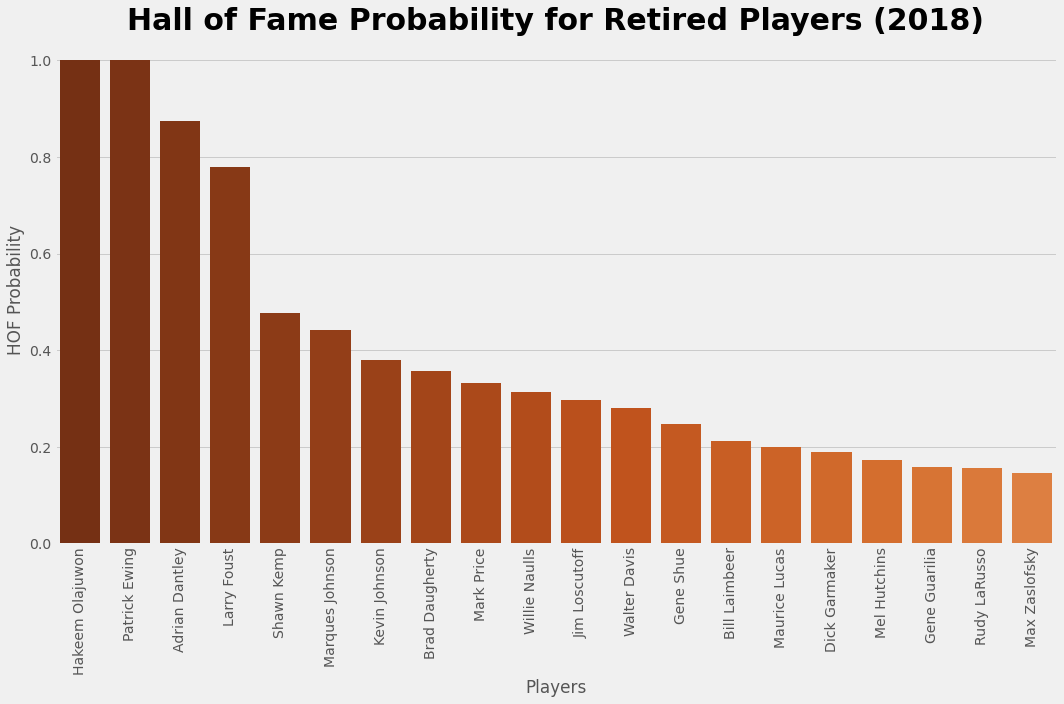

In [42]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=retired_non_hof[:20], 
                                             palette=sns.color_palette("Oranges_r", len(retired_non_hof[:45])))
ax.set_xticklabels(retired_non_hof['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Retired Players (2018)', fontsize=30, fontweight='bold')

plt.tight_layout()
plt.savefig('images/2022_hof_prob.png')

In [43]:
# predict active inductees
active_players = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
active_players = active_players[(active_players['Last Active'] == 2022) |
                               (active_players['Retired'] == 0)]

In [44]:
# lets grab the only columns we need
active_players = active_players[['Player','Debut','Last Active','YOE','Position',
                                   'Team','HOF Probability','HOF (Y/N)']]

display(active_players.head(50))
print(active_players.shape)

Player  Debut  Last Active  YOE Position Team  \
1806           LeBron James   2003         2022   19       SF  CLE   
1012           Kevin Durant   2007         2022   14       SF  OKC   
818           Stephen Curry   2009         2022   13       PG  GSW   
1496           James Harden   2009         2022   13       SG  HOU   
3937      Russell Westbrook   2008         2022   14       PG  OKC   
2885             Chris Paul   2005         2022   17       PG  NOP   
107   Giannis Antetokounmpo   2013         2022    9       PF  MIL   
842           Anthony Davis   2012         2022   10       PF  NOP   
110         Carmelo Anthony   2003         2022   19       SF  DEN   
1697          Dwight Howard   2004         2022   18        C  ORL   
2189          Kawhi Leonard   2011         2021   10       SF  SAS   
2213         Damian Lillard   2012         2022   10       PG  POR   
1759           Kyrie Irving   2011         2022   11       PG  CLE   
1285            Paul George   2010         2022   12       SF  IND   
1913           Nikola Jokić   2015         2022    7        C  DEN   
1416          Blake Griffin   2010         2022   12       PF  LAC   
41        LaMarcus Aldridge   2006         2022   16       PF  POR   
548            Jimmy Butler   2011         2022   11       SG  CHI   
3670          Klay Thompson   2011         2022    9       SG  GSW   
1383         Draymond Green   2012         2022   10       PF  GSW   
1075            Joel Embiid   2016         2022    6        C  PHI   
1322            Rudy Gobert   2013         2022    9        C  UTA   
2250             Kevin Love   2008         2022   14       PF  CLE   
949             Luka Dončić   2018         2022    4       PG  DAL   
2255             Kyle Lowry   2006         2022   16       PG  TOR   
3373            Ben Simmons   2017         2021    4       PG  PHI   
892           DeMar DeRozan   2009         2022   13       SG  TOR   
3712     Karl-Anthony Towns   2015         2022    7        C  MIN   
3844              John Wall   2010         2021   10       PG  WAS   
1272             Marc Gasol   2008         2021   13        C  MEM   
1879            Joe Johnson   2001         2022   18       SG  ATL   
3195            Rajon Rondo   2006         2022   16       PG  BOS   
1681             Al Horford   2007         2022   15        C  ATL   
3594           Jayson Tatum   2017         2022    5       SF  BOS   
767        DeMarcus Cousins   2010         2022   11        C  SAC   
3197           Derrick Rose   2008         2022   13       PG  CHI   
3837           Kemba Walker   2011         2022   11       PG  CHO   
2413          Patrick McCaw   2016         2021    5       SG  TOR   
2566       Donovan Mitchell   2017         2022    5       SG  UTA   
3359          Pascal Siakam   2016         2022    6       PF  TOR   
2526        Khris Middleton   2012         2022   10       SF  MIL   
179             LaMelo Ball   2020         2022    2       PG  CHO   
4164             Trae Young   2018         2022    4       PG  ATL   
2256            Jordan Loyd   2018         2019    1       PG  TOR   
988          Andre Drummond   2012         2022   10        C  DET   
3241       Domantas Sabonis   2016         2022    6       PF  IND   
246            Bradley Beal   2012         2022   10       SG  WAS   
499           Elijah Bryant   2020         2021    1       SG  MIL   
360            Devin Booker   2015         2022    7       SG  PHO   
2609              Ja Morant   2019         2022    3       PG  MEM   

      HOF Probability  HOF (Y/N)  
1806         1.000000          1  
1012         1.000000          1  
818          1.000000          1  
1496         1.000000          1  
3937         1.000000          1  
2885         1.000000          1  
107          0.999999          1  
842          0.995814          1  
110          0.994659          1  
1697         0.989968          1  
2189         0.989512          1  
2213         0.982570         

(845, 8)


In [45]:
nba_players_hof_prob_to_csv = nba_players_hof_prob_to_csv.sort_values(by='HOF Probability', ascending=False)
display(nba_players_hof_prob_to_csv.head(100))

Player  Debut  Last Active  YOE Position Team  \
665        Wilt Chamberlain   1959         1973   14        C  GSW   
2067         Michael Jordan   1984         2003   15       SG  CHI   
2911       Shaquille O'Neal   1992         2011   19        C  LAL   
1899           LeBron James   2003         2022   19       SF  CLE   
2420            Karl Malone   1985         2004   19       PF  UTA   
807               Bob Cousy   1950         1970   14       PG  BOS   
1147          Julius Erving   1971         1987   16       SF  PHI   
1985          Magic Johnson   1979         1996   13       PG  LAL   
1057             Tim Duncan   1997         2016   19        C  SAS   
321              Larry Bird   1979         1992   13       SF  BOS   
529             Kobe Bryant   1996         2016   20       SG  LAL   
3080             Bob Pettit   1954         1965   11       PF  STL   
3401           Bill Russell   1956         1969   13        C  BOS   
2       Kareem Abdul-Jabbar   1969         1989   20        C  LAL   
1064           Kevin Durant   2007         2022   14       SF  OKC   
1635          John Havlicek   1962         1978   16       SF  BOS   
3315        Oscar Robertson   1960         1974   14       PG  SAC   
4139             Jerry West   1960         1974   14       PG  LAL   
1854          Allen Iverson   1996         2010   14       SG  PHI   
2889          Dirk Nowitzki   1998         2019   21       PF  DAL   
1320          Kevin Garnett   1995         2016   21       PF  MIN   
3323         David Robinson   1989         2003   14        C  SAS   
2421           Moses Malone   1974         1995   21        C  HOU   
2938        Hakeem Olajuwon   1984         2002   18        C  HOU   
857           Stephen Curry   2009         2022   13       PG  GSW   
4015            Dwyane Wade   2003         2019   16       SG  MIA   
1356          George Gervin   1972         1986   14       SG  SAS   
204         Charles Barkley   1984         2000   16       PF  PHI   
1578           James Harden   2009         2022   13       SG  HOU   
3454          Dolph Schayes   1949         1964   15       PF  PHI   
4143      Russell Westbrook   2008         2022   14       PG  OKC   
3031             Chris Paul   2005         2022   17       PG  NOP   
2650           George Mikan   1948         1956    7        C  LAL   
227              Rick Barry   1965         1980   14       SF  GSW   
3728          John Stockton   1984         2003   19       PG  UTA   
251            Elgin Baylor   1958         1972   14       SF  LAL   
127             Paul Arizin   1950         1962   10       SF  GSW   
3838           Isiah Thomas   1981         1994   13       PG  DET   
3103         Scottie Pippen   1987         2004   17       SF  CHI   
3516           Bill Sharman   1950         1961   11       SG  BOS   
1647            Elvin Hayes   1968         1984   16       PF  HOU   
2054              Sam Jones   1957         1969   12       SG  BOS   
109   Giannis Antetokounmpo   2013         2022    9       PF  MIL   
3245            Willis Reed   1964         1974   10        C  NYK   
809             Dave Cowens   1970         1983   11        C  BOS   
3045            Gary Payton   1990         2007   17       PG  OKC   
1665           Tom Heinsohn   1956         1965    9       PF  BOS   
1482              Hal Greer   1958         1973   15       SG  PHI   
2818             Steve Nash   1996         2014   18       PG  PHO   
1162          Patrick Ewing   1985         2002   17        C  NYK   
2119             Jason Kidd   1994         2013   19       PG  DAL   
2006          Neil Johnston   1951         1959    8        C  GSW   
1271           Walt Frazier   1967         1980   13       PG  NYK   
4199      Dominique Wilkins   1982         1999   15       SF  ATL   
1034          Clyde Drexler   1983         1998   15       SG  POR   
2511             Bob McAdoo   1972         1986   14        C  BUF   
2366            Jerry Lucas   1